# 3.1_lda_model

The following notebook is used to optimise the LDA model. This was an iterative process that eventually led to the final model. The early iterations have been kept in this notebook to demonstrate the process. 

### Package imports

In [1597]:
# general imports
import pandas as pd
import numpy as np
import capstone_utility_functions as cuf
import seaborn as sns
import matplotlib.pyplot as plt

# webscraping imports
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

# misc imports
import joblib
import re
import io 
from PyPDF2 import PdfReader
import pdftotext

# NLP imports
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk.corpus
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import string

# LDA imports
import gensim 
import pyLDAvis
from gensim import corpora
import pyLDAvis.gensim_models
from sklearn.decomposition import LatentDirichletAllocation
pyLDAvis.enable_notebook()

### 3.1.1 LDA Model - report-wise

The initial Topic Model was carried out on the cleaned dataframe that was used in the EDA. This sample of 99 reports was intentional. It ensured that a quick and computationally cheap model could be trained to get a baseline, which would allow us to work out what the model was learning. 

The initial model used each report as a 'document' of the entire corpus. This was the first of three different methods. Note that at this stage, SK-Learn's implementation of LDA model was used. At a later stage this changes to Gensim's implementation, mainly because Gensim's version works better for large datasets. At a high level, both models do identical things.

The following LDA model has had no tuning, with an arbritary 10 topics chosen.

In [1598]:
df = joblib.load('../data/clean_s_and_p_df.pkl')

In [1599]:
df.head()

,symbol,sector,name,raw_text,word_count,clean_paras
0,FOX,Communication Services,Fox Corporation (Class B),CORPORATESOCIALRESPONSIBILITY report 2021 CELE...,76796,corporatesocialresponsibility celebrating comm...
1,CHTR,Communication Services,Charter Communications,"CHARTER COMMUNICATIONS, INC. 2021 Environmenta...",89975,charter communications environmental governanc...
2,VZ,Communication Services,Verizon,Verizon 2021 ESG Report About this report This...,172803,verizon details performance topics contains fi...
3,LUMN,Communication Services,Lumen Technologies,ESG Report 2021 OUR JOURNEY TO AMAZING THINGS ...,115418,journey amazing things contents empowering peo...
4,ATVI,Communication Services,Activision Blizzard,"ENVIRONMENTAL , SOCIAL , ANDGOVERNANCE REPORT ...",70371,environmental andgovernance daniel alegre open...


In [1600]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning) 
warnings.filterwarnings('ignore', category=FutureWarning) 
warnings.filterwarnings('ignore', category=UserWarning)

In [1601]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [1602]:
X = df['clean_paras']
tf_vectorizer = CountVectorizer(max_df=0.9)
dtm_tf = tf_vectorizer.fit_transform(X)
print(dtm_tf.shape)

(99, 32330)


In [1603]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tf.fit(dtm_tf)

LatentDirichletAllocation(random_state=0)

In [1604]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/henryparemain/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/henryparemain/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/henryparemain/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/Users/henryparemain/opt/anaconda3/envs/Capstone/lib/python3.7/site-packages/setuptools/_distutils/version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/henryparemain/opt/anaconda3/envs/Capstone

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.004217  0.035790       1        1  20.171974
2      0.003872  0.033436       2        1  17.411257
1      0.036531  0.022761       3        1  12.943284
6      0.067263  0.018648       4        1  11.345726
5      0.044871  0.016844       5        1  11.165258
7      0.038694  0.026563       6        1   9.192929
4      0.037036  0.017050       7        1   8.444572
8      0.008291 -0.010959       8        1   5.165383
3     -0.009989 -0.188620       9        1   3.162660
0     -0.230785  0.028488      10        1   0.996956, topic_info=                 Term         Freq        Total Category  logprob  loglift
2223       associates  1024.000000  1024.000000  Default  30.0000  30.0000
17378        marriott   525.000000   525.000000  Default  29.0000  29.0000
9374         electric   936.000000   936.000000  Default  28.0000  28.0000
4901          chapter   778.000000   778.000000  Default  27.0000  27.0000
21552         pioneer   429.000000   429.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
14618  infrastructure    13.474358   763.693038  Topic10  -6.2726   0.5708
23196           rates    11.577685   357.940033  Topic10  -6.4243   1.1769
12792            grid    11.661335   478.087081  Topic10  -6.4171   0.8947
16844         looking    11.769595   823.443927  Topic10  -6.4078   0.3602
2523          average    11.635869   702.697696  Topic10  -6.4192   0.5074

[664 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
78         3  0.987752            abra
200        1  0.093338  accountability
200        2  0.113230  accountability
200        3  0.079567  accountability
200        4  0.489642  accountability
...      ...       ...             ...
32047      2  0.195145           worse
32047      4  0.097573           worse
32047      6  0.097573           worse
32047     10  0.487864           worse
32301      6  0.995863          zimmer

[2385 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 2, 7, 6, 8, 5, 9, 4, 1])

As can be seen, the results are awful. The model is unable to determine distinct topics, as shown by the overlapping circles which represent a topic. The more distinct a topic, the further apart the circles. 

This is most likely to  do with the fact that the input 'document' into the model is an entire multipage report. There is too much noise to determine clear topics, with each single document containing a jumble of topics. 

However, this baseline at least shows what sort of information can be obtained from the topic model, and highlights certain features like the distance between circles indicating how different a topic is, as well as the size of the circle indicating the prevalence of the topic within the corpus. 

The next iteration looks at using a single report, and splitting the report by sentence, to see if the information gained is more useful. 

### 3.1.2 LDA Model - sentence-wise - 3 topics - TF

The below cells focus on Apple as an example. The raw text is within a text file, which was extracted from the pdf using the method shown in notebook 1.1.

In [1605]:
# splitting the apple report by sentence
with open('../data/AAPL.txt', 'r') as file:
    aapl_test = file.read()

aapl_test = aapl_test.replace('\n', '')
#splitting the raw text into sentences (roughly)
aapl_test = aapl_test.split('.')


In [1606]:
aapl_test

['EnvironmentalSocialGovernanceReportApple’s 2021 ESG Report Contents Introduction3  Letter from Tim Cook4   Our approach  Environment Environmental7  C limate change10  Resources12  Smarter chemistry Our People  Social14  I nclusion and diversity 16  Supporting our people17  Benefits18  Compensation20  Engagement20  Workplace practices and policies21 Apple’s COVID-19 response23  Health and safety at Apple  Customers26  Privacy28  Accessibility29  Education31  Health33  Caring for customers  Suppliers36  Our approach to supplier responsibility37  Partnering with our suppliers40  Supplier employees 42  Environment and the supply chain43  Working in partnership  Communities45  Community initiatives48  Community investments51  Job creationOur Business Governance53  C orporate governance55  Our commitment to human rights56  Ethics and compliance58 Tax payments58  Stakeholder engagement  Appendix60  Awards and recognition61  United Nations Sustainable Development Goals63  About the report 6

In [1607]:
df = pd.DataFrame(aapl_test, columns=["raw_sentences"])

In [1608]:
df

,raw_sentences
0,EnvironmentalSocialGovernanceReportApple’s 202...
1,This report contains forward-looking statement...
2,Numbers and percentages in this report includ...
3,"For more information, see ‘About the report’"
4,“At the heart of our work is a steadfast commi...
...,...
1110,apple
1111,com/support/membership-fee-waiver/30 The Board...
1112,31 In the context of Apple’s Board of Director...
1113,32 Total tax payments and average annual effec...


Each row of the above dataframe contains a single sentence from the Apple report. This has been roughly done, splitting at periods. For the purpose of these experiments, it is good enough.

The raw sentences now need to be put through the cleaner. Note that words are lemmatized and only nouns are kept this time around for the LDA, as this is meant to improve results.

In [1609]:
noisy = ['clients','west','percent','letter','sustainability','report','appendix','management','team','social','corporate','responsibility','business','pages','introduction']
df['clean_sentences'] = [cuf.my_cleaner(x,3,noisy_words = noisy,newLineRemove = False,lemmatization=True,nouns = True,) for x in df.raw_sentences]

In [1610]:
df['clean_sentences'] = df.clean_sentences.apply(lambda x: ' '.join(x))

In [1611]:
df

,raw_sentences,clean_sentences
0,EnvironmentalSocialGovernanceReportApple’s 202...,governance apple content cook approach environ...
1,This report contains forward-looking statement...,statement result
2,Numbers and percentages in this report includ...,number percentage estimate approximation assum...
3,"For more information, see ‘About the report’",information
4,“At the heart of our work is a steadfast commi...,heart work planet people
...,...,...
1110,apple,apple
1111,com/support/membership-fee-waiver/30 The Board...,support membership board committee member secu...
1112,31 In the context of Apple’s Board of Director...,context apple board director community self id...
1113,32 Total tax payments and average annual effec...,payment rate reflect data year


We now have a dataframe with the report split by sentences, and each sentence now cleaned and lemmatized. We can input the cleaned sentences into LDA.

In [1612]:
X_sen = df['clean_sentences']
tf_vectorizer_sen = CountVectorizer(min_df=5, max_df=0.9)
dtm_tf_sen = tf_vectorizer_sen.fit_transform(X_sen)
print(dtm_tf_sen.shape)

(1115, 343)


In [1613]:
tfidf_vectorizer_sen = TfidfVectorizer(**tf_vectorizer_sen.get_params())
dtm_tfidf_sen = tfidf_vectorizer_sen.fit_transform(X_sen)
print(dtm_tfidf_sen.shape)

(1115, 343)


In [1614]:
# for TF DTM
lda_tf_sen = LatentDirichletAllocation(n_components=3, random_state=100)
lda_tf_sen.fit(dtm_tf_sen)

# for TFIDF DTM
lda_tfidf_sen = LatentDirichletAllocation(n_components=3,random_state=100)
lda_tfidf_sen.fit(dtm_tfidf_sen)

LatentDirichletAllocation(n_components=3, random_state=100)

In [1615]:
pyLDAvis.sklearn.prepare(lda_tf_sen, dtm_tf_sen, tf_vectorizer_sen)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.100009  0.168394       1        1  39.369730
2     -0.148596 -0.147796       2        1  35.660671
1      0.248605 -0.020599       3        1  24.969599, topic_info=            Term        Freq       Total Category  logprob  loglift
239      product  132.000000  132.000000  Default  30.0000  30.0000
305     supplier  180.000000  180.000000  Default  29.0000  29.0000
104       energy   55.000000   55.000000  Default  28.0000  28.0000
192     material   53.000000   53.000000  Default  27.0000  27.0000
108  environment   98.000000   98.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
102     employee   19.638549  137.630335   Topic3  -4.5006  -0.5596
151       health   17.274958   80.648431   Topic3  -4.6288  -0.1533
139         goal   15.606232   44.365760   Topic3  -4.7304   0.3427
342         year   15.662449   79.098621   Topic3  -4.7268  -0.2319
36         chain   14.355317   72.220583   Topic3  -4.8140  -0.2281

[183 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1         2  0.926268        academy
2         1  0.937138    accelerator
4         1  0.937119  accessibility
14        1  0.436045          apple
14        2  0.474401          apple
...     ...       ...            ...
339       3  0.990269         worker
341       2  0.972550          world
342       1  0.012642           year
342       2  0.796474           year
342       3  0.202279           year

[219 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

Straight away we can see an improvement in the model by using sentences as a document within the corpus, instead of an entire report. The topics are much more distinct, and whilst we are only looking at 3 topics now, later on the 10 topics still show a noticable improvement.

Let's now explore how TFIDF vectorization impacts the results.

### 3.1.3 LDA Model - sentence-wise - 3 topics - TFIDF

In [1616]:
pyLDAvis.sklearn.prepare(lda_tfidf_sen, dtm_tfidf_sen, tfidf_vectorizer_sen)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.140397  0.136688       1        1  37.665715
0     -0.078094 -0.165402       2        1  33.809079
1      0.218491  0.028714       3        1  28.525206, topic_info=         Term       Freq      Total Category  logprob  loglift
239   product  33.000000  33.000000  Default  30.0000  30.0000
342      year  28.000000  28.000000  Default  29.0000  29.0000
104    energy  17.000000  17.000000  Default  28.0000  28.0000
192  material  16.000000  16.000000  Default  27.0000  27.0000
271     right  18.000000  18.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
305  supplier   8.485493  35.462431   Topic3  -4.3612  -0.1757
14      apple   9.152767  75.690060   Topic3  -4.2855  -0.8582
75   customer   6.823035  28.884014   Topic3  -4.5793  -0.1886
151    health   5.736316  20.550659   Topic3  -4.7528  -0.0217
102  employee   5.667655  39.530337   Topic3  -4.7648  -0.6879

[168 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1         1  0.857421   academy
14        1  0.581318     apple
14        2  0.303871     apple
14        3  0.118906     apple
15        2  0.959568  approach
...     ...       ...       ...
339       3  0.950394    worker
341       1  0.745371     world
341       3  0.248457     world
342       1  0.961852      year
342       3  0.035624      year

[180 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

The difference between TF and TFIDF is negligible when using only 3 topics. Let's dive into 10 topics and see if the difference becomes any clearer.

### 3.1.4 LDA Model - sentence-wise - 10 topics - TF

In [1617]:
# for TF DTM
lda_tf_sen = LatentDirichletAllocation(n_components=10, random_state =100)
lda_tf_sen.fit(dtm_tf_sen)

# for TFIDF DTM
lda_tfidf_sen = LatentDirichletAllocation(n_components=10,random_state=100)
lda_tfidf_sen.fit(dtm_tfidf_sen)

LatentDirichletAllocation(random_state=100)

In [1618]:
pyLDAvis.sklearn.prepare(lda_tf_sen, dtm_tf_sen, tf_vectorizer_sen)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.122980  0.076028       1        1  13.877972
2     -0.149576 -0.075504       2        1  11.810547
3      0.166837  0.179316       3        1  10.822260
7     -0.009285  0.097780       4        1  10.087161
6     -0.059796 -0.191658       5        1   9.657653
0     -0.050723  0.019972       6        1   9.027402
4      0.228318  0.134450       7        1   9.017279
9     -0.178615 -0.023057       8        1   8.999368
8     -0.087241  0.054367       9        1   8.804620
1      0.263062 -0.271695      10        1   7.895738, topic_info=            Term        Freq       Total Category  logprob  loglift
239      product  133.000000  133.000000  Default  30.0000  30.0000
222       people  119.000000  119.000000  Default  29.0000  29.0000
75      customer  127.000000  127.000000  Default  28.0000  28.0000
108  environment   97.000000   97.000000  Default  27.0000  27.0000
14         apple  494.000000  494.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
139         goal    7.499555   44.842961  Topic10  -4.3119   0.7505
101     emission    5.117646   29.984983  Topic10  -4.6941   0.7708
77          data    5.659646   55.421677  Topic10  -4.5934   0.2572
220        party    3.844464   21.274990  Topic10  -4.9801   0.8279
75      customer    4.377756  127.925588  Topic10  -4.8502  -0.8361

[446 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         5  0.753623      ability
0        10  0.150725      ability
1         2  0.930447      academy
2         6  0.926385  accelerator
3         5  0.671027       access
...     ...       ...          ...
341       8  0.529469        world
342       2  0.200409         year
342       3  0.062628         year
342       8  0.563650         year
342       9  0.162832         year

[792 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 3, 4, 8, 7, 1, 5, 10, 9, 2])

When comparing to the 10 topics model from the baseline, there is a significant improvement in the coherence of topics, with much less overlap. The only thing that has changed being how the words are fed into the model (sentence by sentence).

### 3.1.5 LDA Model - sentence-wise - 10 topics - TFIDF

In [1619]:
pyLDAvis.sklearn.prepare(lda_tfidf_sen, dtm_tfidf_sen, tfidf_vectorizer_sen)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.037124  0.085779       1        1  12.989746
9      0.083137  0.030732       2        1  11.412100
2      0.068993  0.150551       3        1  11.285794
3     -0.154576  0.031064       4        1  10.968611
6      0.195752  0.014210       5        1   9.849879
8     -0.104575  0.093228       6        1   9.469797
4     -0.117693 -0.178773       7        1   9.462129
7     -0.112707 -0.003504       8        1   8.694300
0      0.092537 -0.025957       9        1   8.074644
1      0.086256 -0.197331      10        1   7.793000, topic_info=         Term       Freq      Total Category  logprob  loglift
239   product  33.000000  33.000000  Default  30.0000  30.0000
222    people  27.000000  27.000000  Default  29.0000  29.0000
335     water  14.000000  14.000000  Default  28.0000  28.0000
192  material  16.000000  16.000000  Default  27.0000  27.0000
102  employee  40.000000  40.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
34     center   1.127337   6.437639  Topic10  -5.0822   0.8096
3      access   1.266668   9.400908  Topic10  -4.9656   0.5475
14      apple   2.288268  76.287918  Topic10  -4.3742  -0.9548
301     store   1.204707  10.549856  Topic10  -5.0158   0.3821
102  employee   1.287514  40.093212  Topic10  -4.9493  -0.8865

[432 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         2  0.305233      ability
0         6  0.610466      ability
1         4  0.843698      academy
2         7  0.493693  accelerator
2         9  0.246846  accelerator
...     ...       ...          ...
342       2  0.035321         year
342       3  0.529813         year
342       5  0.035321         year
342       6  0.247246         year
342       8  0.141284         year

[745 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 10, 3, 4, 7, 9, 5, 8, 1, 2])

The level of overlap is similar to the TF results. However, the interpretability of the topics seem to improve when using TF and bringing the Relevancy Metric to 0. This is something to remember going forward.

### 3.1.6 LDA Model - sentence-wise - 10 topics - TF - not lemmatized

It could be interesting to look at the words not lemmatized. Let's repeat the above but lets not lemmatize the words.

In [1620]:
noisy = ['clients','west','percent','letter','sustainability','report','appendix','management','team','social','corporate','responsibility','business','pages','introduction']
df['clean_sentences_unlemmed'] = [cuf.my_cleaner(x,3,noisy_words = noisy,newLineRemove = False,lemmatization=False,nouns = True,) for x in df.raw_sentences]

In [1621]:
df['clean_sentences_unlemmed'] = df['clean_sentences_unlemmed'].apply(lambda x: ' '.join(x))

In [1622]:
df.head()

,raw_sentences,clean_sentences,clean_sentences_unlemmed
0,EnvironmentalSocialGovernanceReportApple’s 202...,governance apple content cook approach environ...,governance apple contents cook approach enviro...
1,This report contains forward-looking statement...,statement result,statements results
2,Numbers and percentages in this report includ...,number percentage estimate approximation assum...,numbers percentages estimates approximations a...
3,"For more information, see ‘About the report’",information,information
4,“At the heart of our work is a steadfast commi...,heart work planet people,heart work planet people


In [1623]:
X_sen = df['clean_sentences_unlemmed']
tf_vectorizer_sen = CountVectorizer(min_df=5, max_df=0.9)
dtm_tf_sen = tf_vectorizer_sen.fit_transform(X_sen)
print(dtm_tf_sen.shape)

(1115, 370)


In [1624]:
tfidf_vectorizer_sen = TfidfVectorizer(**tf_vectorizer_sen.get_params())
dtm_tfidf_sen = tfidf_vectorizer_sen.fit_transform(X_sen)
print(dtm_tfidf_sen.shape)

(1115, 370)


In [1625]:
# for TF DTM
lda_tf_sen = LatentDirichletAllocation(n_components=10, random_state=50)
lda_tf_sen.fit(dtm_tf_sen)

# for TFIDF DTM
lda_tfidf_sen = LatentDirichletAllocation(n_components=10, random_state=50)
lda_tfidf_sen.fit(dtm_tfidf_sen)

LatentDirichletAllocation(random_state=50)

In [1626]:
pyLDAvis.sklearn.prepare(lda_tf_sen, dtm_tf_sen, tf_vectorizer_sen)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.019328 -0.050561       1        1  14.586171
0      0.003643 -0.050492       2        1  13.665281
9      0.130141  0.068138       3        1  12.353431
7      0.055794 -0.321760       4        1   9.742330
2      0.107204  0.033881       5        1   9.725654
3      0.090500  0.086450       6        1   9.616349
5     -0.047664  0.042314       7        1   8.894518
1     -0.261024 -0.043848       8        1   7.769216
4      0.103036  0.120933       9        1   7.201762
8     -0.200957  0.114944      10        1   6.445287, topic_info=            Term        Freq       Total Category  logprob  loglift
78     customers  112.000000  112.000000  Default  30.0000  30.0000
230       people  118.000000  118.000000  Default  29.0000  29.0000
106    employees  118.000000  118.000000  Default  28.0000  28.0000
53   communities  120.000000  120.000000  Default  27.0000  27.0000
152       health   79.000000   79.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
323     students    5.726557   24.645108  Topic10  -4.3295   1.2824
368         year    7.473922   62.609549  Topic10  -4.0632   0.6163
15         apple    9.632682  493.181779  Topic10  -3.8094  -1.1939
253     programs    6.010819   66.322517  Topic10  -4.2810   0.3409
78     customers    5.919574  112.050551  Topic10  -4.2963  -0.1989

[454 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         3  0.605226  ability
0         8  0.151306  ability
0         9  0.151306  ability
1         1  0.096724  academy
1         5  0.870518  academy
...     ...       ...      ...
369       1  0.210051    years
369       4  0.210051    years
369       5  0.052513    years
369       7  0.262564    years
369       8  0.210051    years

[861 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 10, 8, 3, 4, 6, 2, 5, 9])

The separation of topics is worse when not lemmatizing. This makes sense, as when not lemmatized, there is much greater potential for different variations of the same word.

Hence, it is clear that lemmatizing is important for topic modelling. It is also clear that the number of topics chosen is an essential parameter to get right for there to be any sense gained.

The below looks at the impact of changing the dimensionality reduction algorithm. 

### 3.1.7 LDA Model - sentence-wise - 10 topics - TF - mds = tsne

The following uses the t-Distributed Stochastic Neighbor Embedding dimensionality reduction algorithm, to explore the impact it has.

In [1627]:
X_sen = df['clean_sentences']
tf_vectorizer_sen = CountVectorizer(min_df=5, max_df=0.9)
dtm_tf_sen = tf_vectorizer_sen.fit_transform(X_sen)
print(dtm_tf_sen.shape)

(1115, 343)


In [1628]:
tfidf_vectorizer_sen = TfidfVectorizer(**tf_vectorizer_sen.get_params())
dtm_tfidf_sen = tfidf_vectorizer_sen.fit_transform(X_sen)
print(dtm_tfidf_sen.shape)

(1115, 343)


In [1629]:
# for TF DTM
lda_tf_sen = LatentDirichletAllocation(n_components=10)
lda_tf_sen.fit(dtm_tf_sen)

# for TFIDF DTM
lda_tfidf_sen = LatentDirichletAllocation(n_components=10)
lda_tfidf_sen.fit(dtm_tfidf_sen)

LatentDirichletAllocation()

In [1630]:
pyLDAvis.sklearn.prepare(lda_tf_sen, dtm_tf_sen, tf_vectorizer_sen,mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
0      32.420952   8.115230       1        1  17.481943
9       0.648955  71.707100       2        1  14.613984
7      71.019684   9.971006       3        1  11.631728
5       3.785981  33.185135       4        1  10.584978
2     -42.666500  -9.222070       5        1   8.404192
3      -3.621689 -43.526516       6        1   7.750774
8      -3.632402  -4.171708       7        1   7.660031
1     -36.584400  35.804413       8        1   7.597559
4      44.391380  50.615383       9        1   7.558947
6      40.235809 -31.591665      10        1   6.715865, topic_info=          Term        Freq       Total Category  logprob  loglift
342       year   78.000000   78.000000  Default  30.0000  30.0000
305   supplier  177.000000  177.000000  Default  29.0000  29.0000
102   employee  138.000000  138.000000  Default  28.0000  28.0000
51   community  156.000000  156.000000  Default  27.0000  27.0000
236    privacy   54.000000   54.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
104     energy    6.720380   54.604066  Topic10  -4.2598   0.6057
32        care    5.335236   24.013706  Topic10  -4.4906   1.1964
102   employee    5.192891  138.711078  Topic10  -4.5176  -0.5844
229     policy    4.730450   54.744234  Topic10  -4.6109   0.2520
38      change    4.133966   35.051688  Topic10  -4.7457   0.5631

[461 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         8  0.752784      ability
0        10  0.150557      ability
1         2  0.909790      academy
2         2  0.422832  accelerator
2         8  0.528540  accelerator
...     ...       ...          ...
341       3  0.023921        world
341       7  0.310971        world
341       8  0.143525        world
341       9  0.191366        world
342       8  0.989411         year

[892 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 8, 6, 3, 4, 9, 2, 5, 7])

### 3.1.8 LDA Model - sentence-wise - 10 topics - TF - mds = mmds

The following uses Metric Multidimensional Scaling dimensionality reduction algorithm, to explore the impact it has.

In [1631]:
pyLDAvis.sklearn.prepare(lda_tf_sen, dtm_tf_sen, tf_vectorizer_sen,mds='mmds')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.170958  0.250515       1        1  17.481943
9      0.150944  0.060237       2        1  14.613984
7     -0.328350  0.068461       3        1  11.631728
5     -0.216715  0.229001       4        1  10.584978
2     -0.012256 -0.115642       5        1   8.404192
3     -0.025237  0.281859       6        1   7.750774
8     -0.037292 -0.362389       7        1   7.660031
1     -0.236384 -0.169032       8        1   7.597559
4      0.212808 -0.246737       9        1   7.558947
6      0.321524  0.003727      10        1   6.715865, topic_info=          Term        Freq       Total Category  logprob  loglift
342       year   78.000000   78.000000  Default  30.0000  30.0000
305   supplier  177.000000  177.000000  Default  29.0000  29.0000
102   employee  138.000000  138.000000  Default  28.0000  28.0000
51   community  156.000000  156.000000  Default  27.0000  27.0000
236    privacy   54.000000   54.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
104     energy    6.720380   54.604066  Topic10  -4.2598   0.6057
32        care    5.335236   24.013706  Topic10  -4.4906   1.1964
102   employee    5.192891  138.711078  Topic10  -4.5176  -0.5844
229     policy    4.730450   54.744234  Topic10  -4.6109   0.2520
38      change    4.133966   35.051688  Topic10  -4.7457   0.5631

[461 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
0         8  0.752784      ability
0        10  0.150557      ability
1         2  0.909790      academy
2         2  0.422832  accelerator
2         8  0.528540  accelerator
...     ...       ...          ...
341       3  0.023921        world
341       7  0.310971        world
341       8  0.143525        world
341       9  0.191366        world
342       8  0.989411         year

[892 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 8, 6, 3, 4, 9, 2, 5, 7])

Whilst using different dimenisonality reduction techniques can be useful in separating the clusters into more distinct groups, this comes at a cost of topics becoming less interpretable. 

Going forward, pcoa algorithm is to be used, as it provides topics which are much more interpretable.

### 3.1.9 LDA Model - paragraph-wise 

Having identified that splitting the reports by sentence before feeding them into the LDA model is more effective than feeding each report as a whole, it would make sense to explore splitting the reports by paragraphs and feeding them into the model. This next section explores that.

The dataframe to be used is similar to that created in Notebook 1.1. However, Notebook 1.1 contains the full 1200 reports. To ensure a fair comparison can be made between the previous sections, we are to use a modified version which uses only 99 S+P500 companies used in the previous section.

The pickle below was created using the same method as Notebook 1.1, but for only 99 companies. The code has not been included as it is a repitition of Notebook 1.1. Please load the pickle and continue from there.

In [1632]:
data = joblib.load('../data/raw_text_data.pkl')

In [1633]:
# col1 = []
# col2 = []
# col3 = []
# for tup in data:
#     col1.append(tup[0])
#     col2.append(tup[1])
#     col3.append(tup[2])

# col1_df = pd.DataFrame(col1)
# col1_df.rename(columns = {0:'ticker'},inplace=True)
# col2_df = pd.DataFrame(col2)
# col2_df.rename(columns = {0:'sector'},inplace=True)
# col3_df = pd.DataFrame(col3)
# col3_df.rename(columns = {0:'raw_paras'},inplace=True)

# df_raw = col1_df
# df_raw = pd.concat([df_raw,col2_df],axis=1)
# df_raw = pd.concat([df_raw,col3_df],axis=1)

# df_raw.nunique()

We now need to clean the paras. The paras need to be tokenised as well due to LDA model being used here. Load pickle instead of runnning cleaner!

In [1634]:
# df_paras = df_raw.copy()
# noisy = ['clients','west','percent','letter','sustainability','report','appendix','management','team','social','corporate','responsibility','business','pages','introduction']

# df_paras['clean_paras'] = [cuf.my_cleaner(x,3,noisy_words = noisy,newLineRemove = False,lemmatization=True,nouns = True,) for x in df_paras.raw_paras]

In [1635]:
# joblib.dump(df_paras, '../data/df_paras_s_and_p.pkl')

In [1636]:
df_paras = joblib.load('../data/df_paras_s_and_p.pkl')

In [1637]:
df_paras.head()

,ticker,sector,raw_paras,clean_paras
0,FOX,Communication Services,The unprecedented and ongoing challenges prese...,"[ongoing, challenge, lead, commitment, philant..."
1,FOX,Communication Services,Students in the vicinity of the Lot and across...,"[student, vicinity, angeles, inspiration, focu..."
2,FOX,Communication Services,Best Place to Work Received a 100% score in th...,"[place, work, right, campaign, foundation, equ..."
3,FOX,Communication Services,"In collaboration with No Kid Hungry, FOX provi...","[collaboration, meal, child]"
4,FOX,Communication Services,Recognized as a DiversityComm Top Employer and...,"[diversity, comm, employer, lgbtq, company]"


We now have reports from 100 companies, split by paragraph, with each paragraph cleaned and tokenised. Lets carry out LDA and see what we get.

In [1638]:
dictionary = corpora.Dictionary(df_paras.clean_paras)
# the no_above = 0.5 means that any words that are included in more than 50% of paragraphs are ignored.
dictionary.filter_extremes(no_above=0.5)

In [1639]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_paras.clean_paras]

Note the below code is commented out as training the LDA takes some time. I advise just loading the pickled model below!

In [1640]:
# Lda = gensim.models.ldamodel.LdaModel
# ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=40,\
#                iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [1641]:
# joblib.dump(ldamodel,'../data/3_topics_100_reports_lda_model.pkl')

In [1642]:
ldamodel = joblib.load('../data/3_topics_100_reports_lda_model.pkl')

In [1643]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')

In [1644]:
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models

topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
p = pyLDAvis.display(topic_data)
p

We can clearly see that 3 topics split the reports clearly into E (topic 3) S (topic 1) and G (topic 2) categories. This is a marked improvement on the early models, and is ultimately what we were trying to achieve from the beginning.

This method of splitting reports by paragraph is the technique to be optimised going forward.

### LDA Early Models - Key Takeaways

The above exploration into LDA has been a useful exercise. The key findings are as follows:

* TF more effective than TFIDF for topic interpretablity.
* The default choice for the mds parameter most effective - other dimensionality reduction algorithms are good at giving distinct and well separated topics, but at the cost of topic interpretability.
* The number of topics is a key parameter that needs to be optimised.
* The Relevance slider on the pyLDAvis visualisation is a useful feature. When set to 0, the words most unique to a topic are shown higher up the ranking and thus give a better idea of what the topic is about.
* Splitting reports by paragraph gives the optimal results. When identifying 3 topics, one can clearly see the topics correspond to Environmental, Social and Governance Topics.

Going forward into the next section, the LDA model is to be optimised, using a variety of techniques. Once again, not every iteration that led to this point is shown in this notebook for the sake of readability. The highlights have been chosen to provide an idea of the process that was used to achieve the final model. 

### LDA Model Optimisation

Ultimately, the model will work in two ways:

1. Provide a score based on 3 topics - E S and G

2. Provide a more general summary to the user, showing a larger number of topics to allow a quick, highlevel overview of the report

The latter of these points means that for each report that a user wants to gain insight for, the model will have to be run afresh each time, as the optimal number of topics differs per report. The optimal number of topics will be based on which number of topics results in the highest coherence score.

The following section mimics this process, taking only a single report (GAP), and trying to find the optimal number of topics. 

#### Coherence Scores

The coherence score for a model gives an indication of how linked the words within each topic are, and therefore how much semantic sense each topic makes. Various research has shown that topic models with a higher coherence score lead to more interpretable topics. 

The below section seeks to find the highest coherence score for the GAP report.

In [1645]:
url = 'https://www.responsibilityreports.com/HostedData/ResponsibilityReports/PDF/NYSE_GPS_2021.pdf'
file_list = []
#try to access url
res = requests.get(url)
#use io.BytesIO to trick the script into thinking the pdf is in memory

pdf = pdftotext.PDF(io.BytesIO(res.content))

pdftotext_text = "\n\n".join(pdf)

In [1646]:
print(pdftotext_text)

2021 ESG REPORT

INCLUSIVE,
BY DESIGN



2

THE BIG PICTURE

2021 ESG REPORT

EMPOWERING WOMEN

ENABLING OPPORTUNITY

ENRICHING COMMUNITIES

GOVERNANCE

CONTENTS

3

14
EMPOWERING WOMEN

THE BIG PICTURE
About Gap Inc.

25

3

33

ENABLING OPPORTUNITY

46

ENRICHING COMMUNITIES

GOVERNANCE

Gap Inc. P.A.C.E.

16

This Way ONward

27

Water Stewardship

35

ESG Oversigh

47

Human Rights and Social Dialogu

19

Talent Developmen

29

Women + Wate

36

Responsible Business Practice

49

Helping Keep Our Supply Chain
Safe During COVID-1

Equality & Belonging

31

50

Employees and Community Impac

32

Resource Efficiency and
Manufacturin37

Stakeholder Engagemen

24

Product Life Cycl

51

ESG Appendix and
Forward-Looking Statement

52

Global Reporting Initiative
(GRI) Inde

53

Sustainability Accounting
Standards Board (SASB) Inde

64

Task Force on Climate-Related
Financial Disclosures (TCFD) Inde

72

Our Commitment to ESG,
CEO Messag

4

2021 Highlights

5

Our Approach – Judy Adler,

In [1647]:
gps_raw_3 = pdftotext_text.split('\n\n')

In [1648]:
gps_raw_3

['2021 ESG REPORT',
 'INCLUSIVE,\nBY DESIGN',
 '\x0c',
 '2',
 'THE BIG PICTURE',
 '2021 ESG REPORT',
 'EMPOWERING WOMEN',
 'ENABLING OPPORTUNITY',
 'ENRICHING COMMUNITIES',
 'GOVERNANCE',
 'CONTENTS',
 '3',
 '14\nEMPOWERING WOMEN',
 'THE BIG PICTURE\nAbout Gap Inc. \x08',
 '25',
 '3',
 '33',
 'ENABLING OPPORTUNITY',
 '46',
 'ENRICHING COMMUNITIES',
 'GOVERNANCE',
 'Gap Inc. P.A.C.E. \x08',
 '16',
 'This Way ONward \x08',
 '27',
 'Water Stewardship \x08',
 '35',
 'ESG Oversight\x08',
 '47',
 'Human Rights and Social Dialogue\x08',
 '19',
 'Talent Development\x08',
 '29',
 'Women + Water\x08',
 '36',
 'Responsible Business Practices\x08',
 '49',
 'Helping Keep Our Supply Chain\nSafe During COVID-19\x08',
 'Equality & Belonging \x08',
 '31',
 '50',
 'Employees and Community Impact\x08',
 '32',
 'Resource Efficiency and\nManufacturing\x0837',
 'Stakeholder Engagement\x08',
 '24',
 'Product Life Cycle\x08',
 '51',
 'ESG Appendix and\nForward-Looking Statements\x08',
 '52',
 'Global Reportin

In [1649]:
# replacing any new line characters within a string with a space
gps_raw_3 = [x.replace('\n',' ') for x in gps_raw_3]

In [1650]:
gps_raw_3

['2021 ESG REPORT',
 'INCLUSIVE, BY DESIGN',
 '\x0c',
 '2',
 'THE BIG PICTURE',
 '2021 ESG REPORT',
 'EMPOWERING WOMEN',
 'ENABLING OPPORTUNITY',
 'ENRICHING COMMUNITIES',
 'GOVERNANCE',
 'CONTENTS',
 '3',
 '14 EMPOWERING WOMEN',
 'THE BIG PICTURE About Gap Inc. \x08',
 '25',
 '3',
 '33',
 'ENABLING OPPORTUNITY',
 '46',
 'ENRICHING COMMUNITIES',
 'GOVERNANCE',
 'Gap Inc. P.A.C.E. \x08',
 '16',
 'This Way ONward \x08',
 '27',
 'Water Stewardship \x08',
 '35',
 'ESG Oversight\x08',
 '47',
 'Human Rights and Social Dialogue\x08',
 '19',
 'Talent Development\x08',
 '29',
 'Women + Water\x08',
 '36',
 'Responsible Business Practices\x08',
 '49',
 'Helping Keep Our Supply Chain Safe During COVID-19\x08',
 'Equality & Belonging \x08',
 '31',
 '50',
 'Employees and Community Impact\x08',
 '32',
 'Resource Efficiency and Manufacturing\x0837',
 'Stakeholder Engagement\x08',
 '24',
 'Product Life Cycle\x08',
 '51',
 'ESG Appendix and Forward-Looking Statements\x08',
 '52',
 'Global Reporting Init

By removing any string less than 10 words in length, we should be able to remove a large chunk of the noise from headings.

In [1651]:
gps_raw_3 = [x for x in gps_raw_3 if len(x.split())>10]

In [1652]:
df_para_raw = pd.DataFrame(gps_raw_3)

In [1653]:
df_para_raw = df_para_raw.rename(columns = {0:'raw_paras'})

In [1654]:
df_para_raw

,raw_paras
0,"Founded in San Francisco in 1969, Gap Inc. is ..."
1,ABOUT THIS REPORT This report covers Gap Inc.’...
2,"Our Athleta brand is a certified B Corp, and w..."
3,"Gap Inc. is an omni-channel retailer, with sal..."
4,The inclusion of information contained in this...
...,...
447,"2021 CDP Climate Change Disclosure: (C2.1, C2...."
448,"c) Describe how processes for identifying, ass..."
449,"2021 CDP Climate Change Disclosure: (C1.1b, C2..."
450,a) Disclose the metrics used by the organizati...


Lets apply the cleaner and see what we end with. 

In [1655]:
noisy = ['clients','west','percent','letter','sustainability','report','appendix','management','team','social','corporate','responsibility','business','pages','introduction']
gps_raw_3 = [cuf.my_cleaner(x,3, noisy_words = noisy, newLineRemove = False,lemmatization=True,nouns = True,) for x in df_para_raw.raw_paras]

In [1656]:
gps_raw_3

[['francisco',
  'collection',
  'purpose',
  'brand',
  'apparel',
  'accessory',
  'good',
  'care',
  'product',
  'woman',
  'child',
  'banana',
  'republic',
  'athleta'],
 ['operation',
  'development',
  'action',
  'program',
  'brand',
  'goal',
  'year',
  'preparation',
  'activity',
  'analysis',
  'trend',
  'impact',
  'program',
  'information',
  'objective',
  'operation',
  'approach',
  'link',
  'section',
  'priority',
  'guide',
  'effort',
  'health',
  'planet',
  'society',
  'environment',
  'governance',
  'support',
  'work',
  'issue',
  'company',
  'performance',
  'reference',
  'reporting',
  'standard',
  'alignment',
  'accounting',
  'standard',
  'board',
  'sasb',
  'standard',
  'task',
  'force',
  'climate',
  'disclosure',
  'nation',
  'principle',
  'communication',
  'progress',
  'assurance',
  'content',
  'quality',
  'review'],
 ['athleta',
  'brand',
  'corp',
  'charter',
  'benefit',
  'corporation',
  'brand',
  'commitment',
  'peo

We now have a list of lists, with each list representing a paragraph. The words are cleaned and lemmatized, with only nouns kept. We can now carry out LDA to see how this has changed our results. 

### Bigram analysis sidetrack...

The most frequent bigrams are shown below, to help decide if bigrams are a useful feature and should be included in the LDA model.

In [1657]:
# Example for detecting bigrams 
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder =nltk.collocations.BigramCollocationFinder.from_documents(gps_raw_3)
# Filter only those that occur at least 50 times
finder.apply_freq_filter(8)
bigram_scores = finder.score_ngrams(bigram_measures.pmi)

In [1658]:
bigram_scores

[(('prevention', 'response'), 8.536093810930593),
 (('distribution', 'center'), 8.140165134599453),
 (('gender', 'violence'), 8.090534366874852),
 (('life', 'cycle'), 7.784021324374178),
 (('supply', 'chain'), 6.848561576568889),
 (('change', 'disclosure'), 6.332810212541849),
 (('empower', 'work'), 6.205753476227031),
 (('scope', 'emission'), 6.2031632219857595),
 (('climate', 'change'), 5.98731364651608),
 (('woman', 'girl'), 5.714092112908586),
 (('tier', 'supplier'), 5.695674749533639),
 (('water', 'sanitation'), 5.256544318313782),
 (('climate', 'disclosure'), 5.1222432266021904),
 (('water', 'resilience'), 4.841506819034937),
 (('water', 'stewardship'), 4.619114397698491),
 (('water', 'quality'), 4.4264693197560945),
 (('risk', 'opportunity'), 4.3619565582013635),
 (('climate', 'risk'), 4.221778900153103),
 (('access', 'water'), 3.789039399140803),
 (('woman', 'opportunity'), 3.5399548601793605),
 (('supplier', 'facility'), 3.3488719860072482),
 (('woman', 'water'), 2.25654431831

The bigrams are all fairly generic and it does not look like they will offer more than just taking the individual tokens.

### 3.1.10 LDA Model - paragraph-wise - optimising coherence score

Creating dataframe for cleaned and tokenised paragraphs...

In [1659]:
di = {}
i = 0
for para in gps_raw_3:
    di[i] = para
    i+=1

In [1660]:
gps_df = pd.DataFrame({'para':di.values()})

In [1661]:
gps_df

,para
0,"[francisco, collection, purpose, brand, appare..."
1,"[operation, development, action, program, bran..."
2,"[athleta, brand, corp, charter, benefit, corpo..."
3,"[channel, retailer, sale, customer, store, com..."
4,"[inclusion, information, faith, information, s..."
...,...
447,"[climate, change, disclosure, practice, change..."
448,"[process, climate, risk, organization, risk]"
449,"[climate, change, disclosure, practice]"
450,"[metric, organization, climate, risk, opportun..."


In [1662]:
dictionary = corpora.Dictionary(gps_df.para)
dictionary.filter_extremes(no_above=0.9)


In [1663]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in gps_df.para]

Note that the below loop is used to go through a range of topic numbers, and calculate the coherence score for each loop. It can take a while to run, so I advise using the pickle below!

In [1664]:
# coherence = []
# for k in range(3,30):
#     print('Round: '+str(k))
#     Lda = gensim.models.ldamodel.LdaModel
#     ldamodel = Lda(doc_term_matrix, num_topics=k, id2word = dictionary, passes=40,\
#                    iterations=200, chunksize = 10000, eval_every = None)
    
#     cm = gensim.models.coherencemodel.CoherenceModel(model=ldamodel, texts=gps_df.para,\
#                                                      dictionary=dictionary, coherence='c_v')
#     coherence.append((k,cm.get_coherence()))

In [1665]:
# import joblib
# coherence_model_eval = joblib.dump(coherence,'../data/coherence_model_eval_gps_para.pkl')

In [1666]:
import joblib
coherence = joblib.load('../data/coherence_model_eval_gps_para.pkl')

In [1667]:
x_val = [x[0] for x in coherence]
y_val = [x[1] for x in coherence]

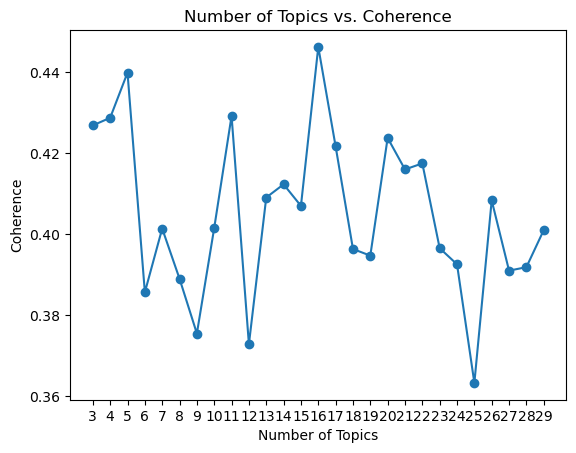

In [1668]:
plt.plot(x_val,y_val)
plt.scatter(x_val,y_val)
plt.title('Number of Topics vs. Coherence')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence')
plt.xticks(x_val)
plt.show()

The coherence score peaks for 16 topics. The LDA model is now run using 16 topics to explore which topics are output.

In [1669]:
# 16 topics
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics=16, id2word = dictionary, passes=40,\
               iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [1670]:
import pyLDAvis.gensim_models
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')

In [1671]:
all_topics = {}
num_terms = 10 # Adjust number of words to represent each topic
lambd = 0 # Adjust this accordingly based on tuning above
for i in range(1,17): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [1672]:
pd.DataFrame(all_topics).T

,0,1,2,3,4,5,6,7,8,9
Topic 1,capability,liter,building,innovation,stewardship,supply,water,transparency,chain,pursue
Topic 2,skill,career,participant,curriculum,education,workforce,advancement,gender,empower,labor
Topic 3,sanitation,statement,parity,integrity,event,alliance,hour,director,access,time
Topic 4,corruption,policy,core,structure,activity,covc,plan,enterprise,conduct,issue
Topic 5,body,girl,role,power,project,equity,athleta,child,today,step
Topic 6,rate,remediation,prevention,tier,violation,facility,higg,assessment,module,audit
Topic 7,scope,risk,discussion,learn,form,result,process,good,please,information
Topic 8,consumption,fiber,footprint,decision,integrate,material,place,product,focus,solution
Topic 9,talent,culture,equality,entry,experience,employee,campaign,inclusion,benefit,store
Topic 10,distribution,survey,wage,center,alternative,data,reduction,polyester,emission,energy


In [1673]:
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models

topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
p = pyLDAvis.display(topic_data)
p

By using the maximum coherence score, we can see that the topics (mostly) make sense, and is a useful tool in deciding how many topics to aim for. 

#### Relevancy Factor

The relevancy factor is a feature which is provided by the pyLDAvis package, and is part of the visualisation of topics as seen in the above. The slider allows you to choose the relevancy - a relevancy of 0 gives a greater weighting to words most relevant to that topic, whilst a relevancy of 1 gives a different set of words, putting more weight of the overall frequency. 

The below code looks at how the equation for relevancy can be utilised to get a dataframe containing the most **relevant** words. For this, we will use the model previously pickled, which takes 3 topics from 99 S+P500 reports split by paragraph.

In [1674]:
dictionary = corpora.Dictionary(df_paras.clean_paras)
# the no_above = 0.5 means that any words that are included in more than 50% of paragraphs are ignored.
dictionary.filter_extremes(no_above=0.5)

In [1675]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_paras.clean_paras]

In [1676]:
ldamodel = joblib.load('../data/3_topics_100_reports_lda_model.pkl')

In [1677]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')

In [1678]:
import pyLDAvis
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models

topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')
p = pyLDAvis.display(topic_data)
p

The below code aims to extract the most *relevant* words for each topic.

In [1679]:
all_topics = {}
num_terms = 50 # Adjust number of words to represent each topic
lambd = 0 # Adjust this accordingly based on tuning above
for i in range(1,3+1): #Adjust this to reflect number of topics chosen for final LDA model
    topic = topic_data.topic_info[topic_data.topic_info.Category == 'Topic'+str(i)].copy()
    topic['relevance'] = topic['loglift']*(1-lambd)+topic['logprob']*lambd
    all_topics['Topic '+str(i)] = topic.sort_values(by='relevance', ascending=False).Term[:num_terms].values

In [1680]:
specific_words_df = pd.DataFrame(all_topics)
specific_words_df.head(10)

,Topic 1,Topic 2,Topic 3
0,community,safety,energy
1,diversity,supplier,emission
2,leadership,compliance,water
3,inclusion,conduct,climate
4,leader,ethic,carbon
5,woman,code,scope
6,foundation,security,reduction
7,education,privacy,efficiency
8,talent,incident,utility
9,career,audit,electricity


We are able to extract the most relevant words for the 3 topics, which gives a great outcome. The topics are easily identifiable. 

### Training Final Model

Having explored the various parameters and gained a better understanding of what works well for LDA, we can now train the final model. This model is to be trained on the full 1200 report bank, which are split by paragraphs. The dataframe that was created in Notebook 1.1 is to be imported.

In [1681]:
df = joblib.load('../data/clean_paras_df.pkl')

In [1682]:
df

,ticker,raw_paras,clean_paras
0,MMM,Growing our business by enabling action and im...,"[action, impact, humanity, challenge]"
1,MMM,Contents Our leadership Message from our CEO ...,"[content, leadership, message, message]"
2,MMM,"Environmental, health, and safety management ...","[health, safety, material, energy, supplier]"
3,MMM,Mike Roman The last year has brought extraordi...,"[mike, roman, year, challenge, time, recommit,..."
4,MMM,The pandemic has reinforced the importance of ...,"[pandemic, importance, science, challenge]"
...,...,...,...
371195,FIVE,• The planet: Our approach and 2021 highlights...,"[planet, approach, highlight, packaging, impac..."
371196,FIVE,"Goal 15. Protect, restore and promote sustaina...","[goal, protect, restore, promote, forest, dese..."
371197,FIVE,"• 15.2 By 2020, promote the implementation of ...","[implementation, type, halt, deforestation, re..."
371198,FIVE,• The planet: Reduced climate impact and energ...,"[planet, impact, energy, efficiency, consumption]"


There are some companies with duplicate tickers in the above dataframe. This will be problematic when it comes to the scoring process later down the line. Hence, these duplicate rows are to be dropped.

In [1683]:
list_to_drop =['ADM','BBY','PSN','WHR','AAL','GFS','PFG']
df = df.set_index('ticker').drop(list_to_drop)

In [1684]:
df

,raw_paras,clean_paras
ticker,,
MMM,Growing our business by enabling action and im...,"[action, impact, humanity, challenge]"
MMM,Contents Our leadership Message from our CEO ...,"[content, leadership, message, message]"
MMM,"Environmental, health, and safety management ...","[health, safety, material, energy, supplier]"
MMM,Mike Roman The last year has brought extraordi...,"[mike, roman, year, challenge, time, recommit,..."
MMM,The pandemic has reinforced the importance of ...,"[pandemic, importance, science, challenge]"
...,...,...
FIVE,• The planet: Our approach and 2021 highlights...,"[planet, approach, highlight, packaging, impac..."
FIVE,"Goal 15. Protect, restore and promote sustaina...","[goal, protect, restore, promote, forest, dese..."
FIVE,"• 15.2 By 2020, promote the implementation of ...","[implementation, type, halt, deforestation, re..."


The below cells are the training of the final model. It is a time consuming process and so I have pickled the model for you to just load instead.

In [1685]:
# dictionary = corpora.Dictionary(df_paras.clean_paras)
# dictionary.filter_extremes(no_above=0.5)

In [1686]:
# joblib.dump(dictionary, '../data/trained_lda_1200_dictionary.pkl')

In [1687]:
dictionary = joblib.load('../data/trained_lda_1200_dictionary.pkl')

In [1688]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_paras.clean_paras]

In [1689]:
# Lda = gensim.models.ldamodel.LdaModel
# ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=40,\
#                iterations=200,  chunksize = 10000, eval_every = None, random_state=0)

In [1690]:
# joblib.dump(ldamodel,'../data/3_topics_1200_reports_lda_model.pkl')

In [1691]:
ldamodel = joblib.load('../data/3_topics_1200_reports_lda_model.pkl')

In [1692]:
topic_data =  pyLDAvis.gensim_models.prepare(ldamodel, doc_term_matrix, dictionary, mds = 'pcoa')

In [1693]:
p = pyLDAvis.display(topic_data)
p

As can be seen, the trained model is able to very clearly identify the 3 topics of E S and G. The next task is to create a 'score' for each paragraph, which will based on how much / how intensely a certain topic is talked about in a given report. This is a very basic and crude form of scoring, but it demonstrates a potential usecase of the model.

### Obtaining an ESG Score

The top words per topic from the trained model can be seen below.

In [1694]:
# Print the list of words for each topic
for topic_id, topic_words in ldamodel.print_topics(num_topics=3, num_words=10):
    print(f'Topic {topic_id}: {topic_words}')

Topic 0: 0.038*"employee" + 0.021*"community" + 0.016*"people" + 0.013*"program" + 0.012*"support" + 0.012*"health" + 0.012*"development" + 0.012*"work" + 0.010*"company" + 0.009*"team"
Topic 1: 0.030*"risk" + 0.024*"management" + 0.017*"company" + 0.016*"policy" + 0.016*"safety" + 0.015*"information" + 0.014*"board" + 0.013*"supplier" + 0.012*"climate" + 0.012*"group"
Topic 2: 0.030*"emission" + 0.027*"energy" + 0.024*"product" + 0.020*"water" + 0.014*"waste" + 0.013*"carbon" + 0.011*"scope" + 0.010*"project" + 0.010*"operation" + 0.008*"system"


As can be seen, Topic 0 correlates with S, Topic 1 with G and Topic 2 with E.

In [1695]:
number_of_cols = 3
column_li = list(range(0,3))
column_li = ['S','G','E']
column_li

['S', 'G', 'E']

In [1696]:
a = np.empty((df.shape[0],3))
a[:] = np.nan
df_probs = pd.DataFrame(columns=column_li, data=a)

The below cell block iterates through each paragraph and feeds it into the LDA model, to obtain the probability of the 3 topics being in a given paragraph.

In [1697]:
df.reset_index(inplace=True)

In [1698]:
# for index, row in df.iterrows():
#     #get the topic probabilities
#     test_bow = ldamodel.id2word.doc2bow(df.clean_paras[index])
#     res = ldamodel[test_bow]
#     #append probabilities to the df_probs
#     for i in res:
#         row_num = index
#         col_num = i[0]
#         probability = i[1]
#         df_probs.iloc[row_num, col_num] = probability

In [1699]:
# joblib.dump(df_probs, '../data/df_probs.pkl')

In [1700]:
df_probs = joblib.load('../data/df_probs.pkl')

In [1701]:
df_probs

,S,G,E
0,0.836250,0.085016,0.078734
1,0.848668,0.082557,0.068774
2,0.064074,0.607585,0.328341
3,0.950753,0.024667,0.024581
4,0.857192,0.069275,0.073534
...,...,...,...
366286,0.027253,0.217950,0.754798
366287,0.026000,0.025047,0.948953
366288,0.037223,0.039860,0.922917
366289,0.057421,0.056852,0.885728


In [1702]:
df.shape

(366291, 3)

In [1703]:
df_final = pd.concat([df,df_probs],axis=1)

In [1704]:
df_final

,ticker,raw_paras,clean_paras,S,G,E
0,MMM,Growing our business by enabling action and im...,"[action, impact, humanity, challenge]",0.836250,0.085016,0.078734
1,MMM,Contents Our leadership Message from our CEO ...,"[content, leadership, message, message]",0.848668,0.082557,0.068774
2,MMM,"Environmental, health, and safety management ...","[health, safety, material, energy, supplier]",0.064074,0.607585,0.328341
3,MMM,Mike Roman The last year has brought extraordi...,"[mike, roman, year, challenge, time, recommit,...",0.950753,0.024667,0.024581
4,MMM,The pandemic has reinforced the importance of ...,"[pandemic, importance, science, challenge]",0.857192,0.069275,0.073534
...,...,...,...,...,...,...
366286,FIVE,• The planet: Our approach and 2021 highlights...,"[planet, approach, highlight, packaging, impac...",0.027253,0.217950,0.754798
366287,FIVE,"Goal 15. Protect, restore and promote sustaina...","[goal, protect, restore, promote, forest, dese...",0.026000,0.025047,0.948953
366288,FIVE,"• 15.2 By 2020, promote the implementation of ...","[implementation, type, halt, deforestation, re...",0.037223,0.039860,0.922917
366289,FIVE,• The planet: Reduced climate impact and energ...,"[planet, impact, energy, efficiency, consumption]",0.057421,0.056852,0.885728


Let's take a look at a random sample of paragraphs and the associated E S G scores to see if the model is correct.

In [1705]:
test = df_final.sample(5, random_state =170)
print(test.iloc[1,1])
print(test.iloc[1,3:6])

test = df_final.sample(5,random_state =30)
print(test.iloc[1,1])
print(test.iloc[1,3:6])

test = df_final.sample(5,random_state =550)
print(test.iloc[1,1])
print(test.iloc[1,3:6])



Keeping employees safe during COVID-19 As the COVID-19 pandemic posed ongoing safety risks in 2021, we continued to take steps to protect our workers and reduce the risk of transmission in our workplaces. We continuously adapted our strategy and practices through a science-based approach, and we adjust to new governmental and regulatory regulations where and when needed. Employees were informed of safety best practices through trainings, updated signage, videos, frequent communication from leadership, and updates via our dedicated internal COVID-19 website. For our onsite workers, we employed administrative, engineering, and environmental controls such as face masks, temperature monitoring, social distancing, sanitization, workforce segmentation, enhanced indoor air quality controls, and offered free onsite testing and vaccination clinics. We also focused on expanded workplace flexibility to improve and allow for remote work where possible.
S    0.602064
G    0.305031
E    0.092905
Nam

The model does a good job in predicting the topic distribution within a given paragraph. What is particularly good to see if that it is able to pick up the different strengths of a topic in a single paragraph - aka if a paragraph is linked to all 3 topics, the model can predict this.

Looking at the distribution of the number of cleaned tokens for all paragraphs...

In [1706]:
df_final['num_of_tokens'] = df_final.clean_paras.apply(len)

In [1707]:
df_final.num_of_tokens.describe()

count    366291.000000
mean         17.726458
std          20.118665
min           0.000000
25%           6.000000
50%          10.000000
75%          23.000000
max         545.000000
Name: num_of_tokens, dtype: float64

<AxesSubplot:>

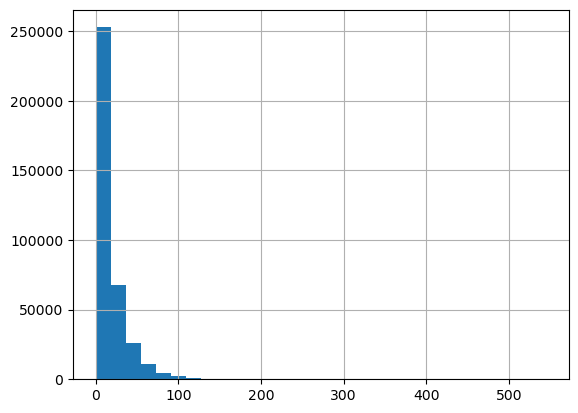

In [1708]:
df_final.num_of_tokens.hist(bins = 30)

There are clearly some outliers, with a few incredibly long paragraphs, which has likely come from an error in the preprocessing pipeline. These outliers should be removed. Any paragraph with less than 5 tokens also is to be dropped, as this likely adding more noise than anything else.

In [1709]:
#threshold 1
p99 = np.percentile(df_final.num_of_tokens, 99)
p99

94.0

Let's see how many rows exceed this threshold...

In [1710]:
# Identify values that exceed the 99th percentile threshold
outliers = df_final.num_of_tokens[df_final.num_of_tokens > p99]

# Count the number of rows that exceed the threshold
num_outliers = len(outliers)
100*num_outliers/df_final.shape[0]

0.9981135217627515

These outliers account for less than 1% of the total number of paragraphs. Let's drop them.

In [1711]:
df_final = df_final[df_final["num_of_tokens"] <= p99]


Text(0.5, 1.0, 'Distribution of the number of cleaned tokens')

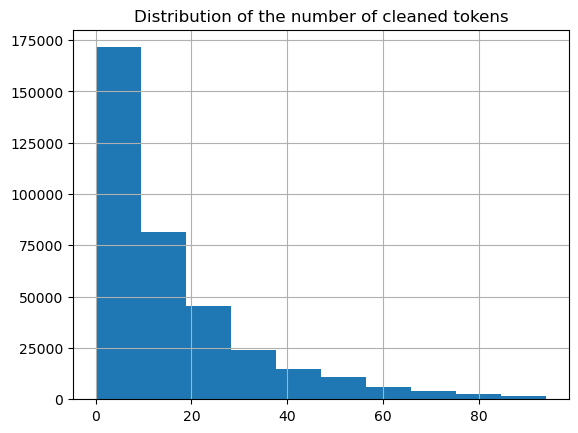

In [1712]:
df_final.num_of_tokens.hist()
plt.title('Distribution of the number of cleaned tokens')

The distribution looks much better having dropped the outliers. Let's also drop any rows where the number of tokens is less than 5.

In [1713]:
df_final = df_final[df_final["num_of_tokens"]> 5]


Text(0.5, 1.0, 'Distribution of the number of cleaned tokens')

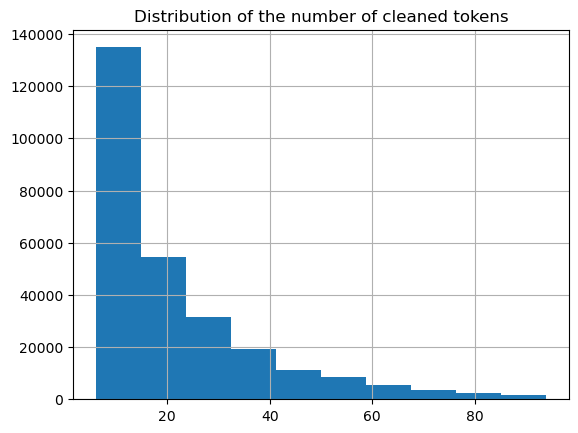

In [1714]:
df_final.num_of_tokens.hist()
plt.title('Distribution of the number of cleaned tokens')

The distribution of paragraph length looks much better now. 

### Weighting the scores

One option that was explored was weighting the scores based on the length of the paragraph. The logic here was that the longer the paragraph (and more tokens), the greater the chance that the topic distribution was accurate, as there was more data to base the probabilities off of.

The original weighting process therefore multipled each ESG score by the number of tokens. However, this actually ended up creating a huge disparity in results, with some scores much higher than others. After further consideration, it was decided that the better results were from using the pure unweighted scores.

In [1715]:
df_final.drop(columns= ['num_of_tokens'],inplace=True)

In [1716]:
df_final

,ticker,raw_paras,clean_paras,S,G,E
3,MMM,Mike Roman The last year has brought extraordi...,"[mike, roman, year, challenge, time, recommit,...",0.950753,0.024667,0.024581
5,MMM,"We fought COVID-19 from every angle, including...","[fought, covid, angle, respirator, health, car...",0.959187,0.026596,0.014217
6,MMM,We are committed to being leaders in sustainab...,"[leader, greenhouse, emission, decade, site, w...",0.280323,0.024041,0.695636
7,MMM,"As we have for decades, we continue to advance...","[decade, leadership, year, initiative, science...",0.162014,0.014676,0.823310
10,MMM,We will install advanced filtration technology...,"[install, filtration, technology, water, site,...",0.154092,0.245762,0.600146
...,...,...,...,...,...,...
366285,FIVE,"• 14.1 By 2025, prevent and significantly redu...","[prevent, marine, pollution, land, activity, n...",0.042642,0.045266,0.912093
366286,FIVE,• The planet: Our approach and 2021 highlights...,"[planet, approach, highlight, packaging, impac...",0.027253,0.217950,0.754798
366287,FIVE,"Goal 15. Protect, restore and promote sustaina...","[goal, protect, restore, promote, forest, dese...",0.026000,0.025047,0.948953
366288,FIVE,"• 15.2 By 2020, promote the implementation of ...","[implementation, type, halt, deforestation, re...",0.037223,0.039860,0.922917


In [1717]:
df_final.describe()

,S,G,E
count,265365.000000,264932.000000,261570.000000
mean,0.366225,0.338663,0.328670
std,0.341626,0.330861,0.341661
min,0.010000,0.010000,0.010000
25%,0.043333,0.041729,0.036073
50%,0.246901,0.207704,0.162381
75%,0.687983,0.622468,0.634384
max,0.992613,0.992432,0.992345


To obtain a single score for E S and G for a given report, the mean scores are taken. This ensures that a longer report is not given a 
larger score purely due to its length.

In [1718]:
df_scores = (df_final.groupby('ticker').sum()/df_final.groupby('ticker').count())

In [1719]:
df_scores.drop(columns = ['clean_paras','raw_paras'], inplace = True)

In [1720]:
df_scores = round(df_scores * 100,2)

In [1721]:
df_scores.describe()

,E,G,S
count,1048.000000,1048.000000,1048.000000
mean,32.188750,32.677042,38.235763
std,11.624807,9.199464,12.310545
min,5.830000,5.510000,8.610000
25%,22.570000,27.045000,29.745000
50%,33.080000,32.385000,36.190000
75%,39.912500,38.512500,46.020000
max,76.740000,75.050000,79.910000


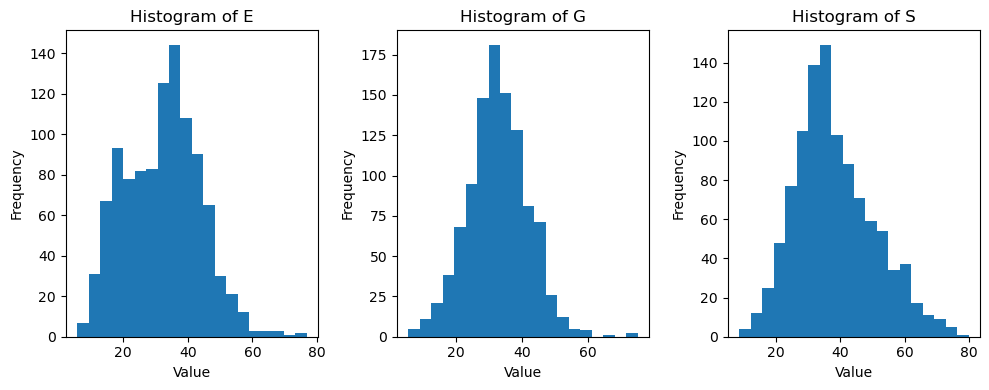

In [1722]:
columns = ['E','G','S']

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Loop through the column names and plot histograms on each subplot
for i, column_name in enumerate(columns):
    # Plot the histogram on the current subplot
    axs[i].hist(df_scores[column_name], bins=20)
    
    # Add a title and labels for the plot
    axs[i].set_title('Histogram of ' + column_name)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The scoring method has given a roughly normal distribution. The outliers should be removed and then the scores should be scaled.

In [1723]:
#threshold 1
p99_e = np.percentile(df_scores.E, 99)
p99_e
df_scores_outliers_rem = df_scores[df_scores["E"] <= p99_e]

In [1724]:
df_scores_outliers_rem.shape

(1037, 3)

In [1725]:
p99_s = np.percentile(df_scores.S, 99)
p99_s
df_scores_outliers_rem = df_scores_outliers_rem[df_scores_outliers_rem["S"] <= p99_s]

In [1726]:
p99_g = np.percentile(df_scores.G, 99)
p99_g
df_scores_outliers_rem = df_scores_outliers_rem[df_scores_outliers_rem["G"] <= p99_g]

In [1727]:
df_scores_outliers_rem.shape

(1015, 3)

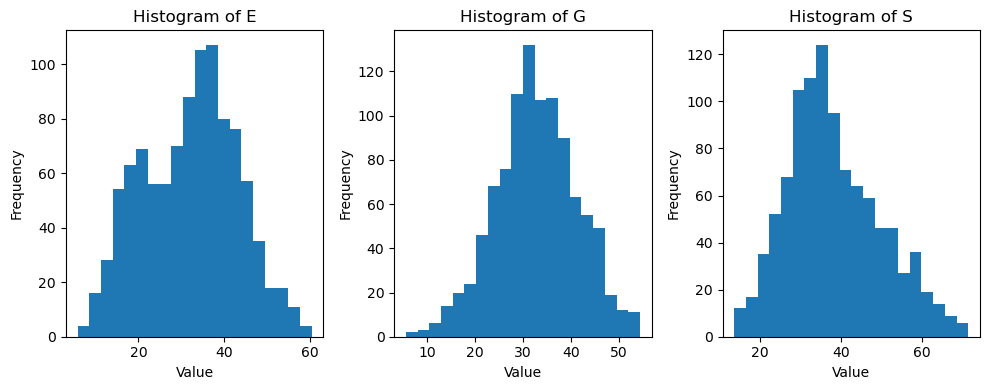

In [1728]:
columns = ['E','G','S']

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# Loop through the column names and plot histograms on each subplot
for i, column_name in enumerate(columns):
    # Plot the histogram on the current subplot
    axs[i].hist(df_scores_outliers_rem[column_name], bins=20)
    
    # Add a title and labels for the plot
    axs[i].set_title('Histogram of ' + column_name)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

The scores have now had any outliers removed. Interestingly, the histogram for E-scores look like there are potentially two separete distributions within. This is suggestive of two clusters of company. This is something that is not going to be explored further, but may tie in with the work completed in Notebook 3.2.

In [1729]:
df_scores_outliers_rem

,E,G,S
ticker,,,
A,34.52,35.78,33.26
AA,41.57,34.48,27.36
AAON,44.07,11.65,45.27
AAP,19.61,27.68,57.55
AAPL,24.38,27.79,52.94
...,...,...,...
ZEAL,19.43,30.85,50.71
ZEN,17.53,29.25,56.11
ZI,13.58,22.84,65.04


In [1730]:
df_scores = df_scores_outliers_rem.copy()

We can take a random 20 reports and visualise the distribution of scores on a heatmap.

In [1731]:
df_sample = df_scores.sample(20)

<AxesSubplot:ylabel='ticker'>

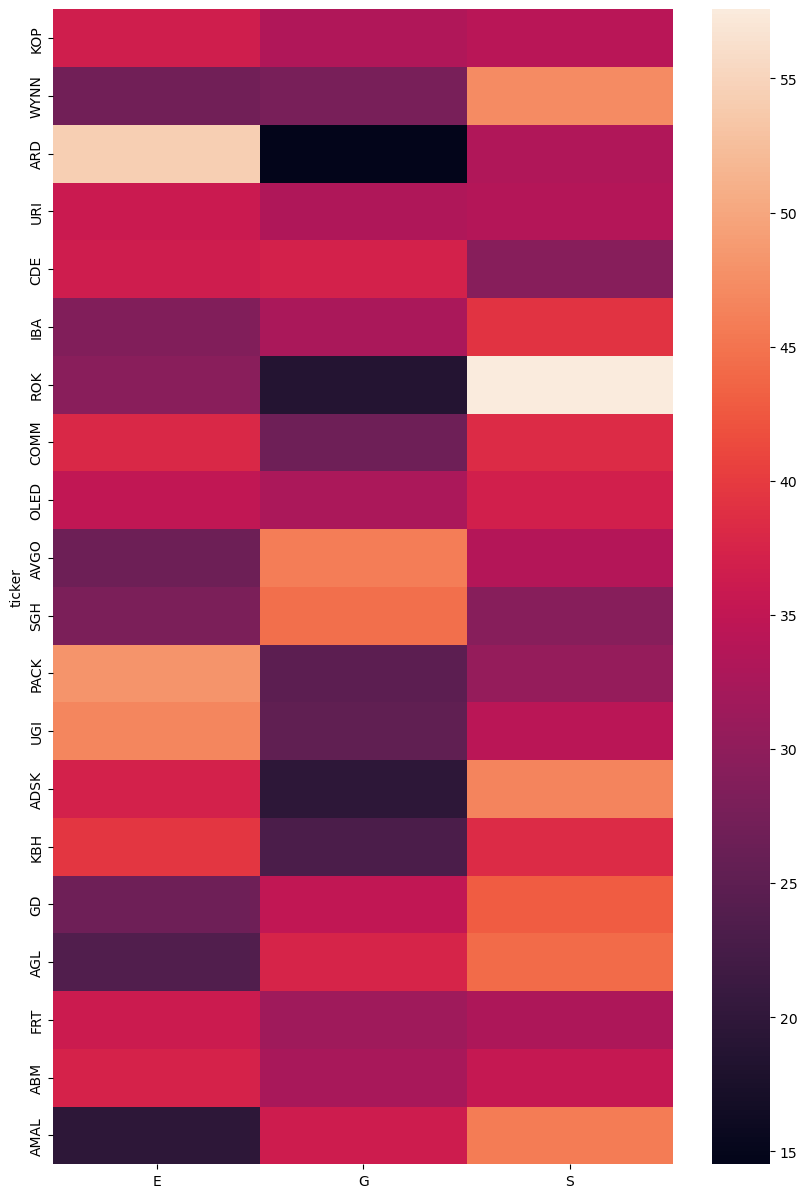

In [1732]:
plt.figure(figsize=(10,15))
sns.heatmap(data = df_sample)

The above is useful to get a quick idea of how the scoring is distributed.

In [1733]:
joblib.dump(df_scores, '../data/df_scores_1200.pkl')

['../data/df_scores_1200.pkl']

In [1734]:
# df_scores.to_csv('scores_1200.csv')

Having obtained a 'score' for each report, based on the extent to which each topic is mentioned in the report, it would be cool to explore how these scores differ to a legitimate set of scores. Notebook 1.2 gathers historical scores from January 2021. We can look at these scores and compare.

In [1735]:
df_scores_hist = joblib.load('../data/df_scores.pkl')

In [1736]:
df_scores_hist

,Total-Score,E-Score,S-Score,G-Score,e_rank,s_rank,g_rank
tick,,,,,,,
A,16.64,0.87,9.44,6.33,8,4,4
AAPL,16.46,0.10,7.55,8.82,9,6,1
ACGL,26.56,2.15,11.03,13.37,6,2,0
AEP,34.44,19.33,9.83,5.28,0,4,7
AIZ,25.15,1.26,10.65,13.25,8,2,0
...,...,...,...,...,...,...,...
VRTX,24.84,0.15,17.22,7.46,9,0,3
VTR,12.20,3.40,4.03,4.77,6,8,8
VZ,18.09,1.71,10.20,6.18,7,3,5


Only scores for 91 companies have been collected. The rank column gives the decile with which each company falls in for the 3 scores. Let's join on my scores to this dataframe and compare.

In [1737]:
df_scores_hist = df_scores_hist.reset_index()

In [1738]:
df_scores_hist.rename(columns={'tick':'ticker'},inplace=True)

In [1739]:
df_scores_merged = df_scores_hist.merge(df_scores,on='ticker')

In [1740]:
df_scores_merged

,ticker,Total-Score,E-Score,S-Score,G-Score,e_rank,s_rank,g_rank,E,G,S
0,A,16.64,0.87,9.44,6.33,8,4,4,34.52,35.78,33.26
1,AAPL,16.46,0.10,7.55,8.82,9,6,1,24.38,27.79,52.94
2,ACGL,26.56,2.15,11.03,13.37,6,2,0,15.92,36.24,50.14
3,AEP,34.44,19.33,9.83,5.28,0,4,7,35.40,28.90,43.46
4,AIZ,25.15,1.26,10.65,13.25,8,2,0,20.84,31.91,48.74
...,...,...,...,...,...,...,...,...,...,...,...
80,VRTX,24.84,0.15,17.22,7.46,9,0,3,28.93,20.96,55.44
81,VTR,12.20,3.40,4.03,4.77,6,8,8,22.08,36.82,42.19
82,VZ,18.09,1.71,10.20,6.18,7,3,5,25.95,40.28,42.06
83,WMT,27.29,3.19,17.20,6.91,6,0,4,35.66,25.78,41.24


Let's give my scores a rank column.

In [1741]:
df_scores_merged['e_rank_hp'] = pd.qcut(df_scores_merged['E'],10, labels=False)
df_scores_merged['s_rank_hp'] = pd.qcut(df_scores_merged['S'],10, labels=False)
df_scores_merged['g_rank_hp'] = pd.qcut(df_scores_merged['G'],10, labels=False)

In [1742]:
df_scores_merged

,ticker,Total-Score,E-Score,S-Score,G-Score,e_rank,s_rank,g_rank,E,G,S,e_rank_hp,s_rank_hp,g_rank_hp
0,A,16.64,0.87,9.44,6.33,8,4,4,34.52,35.78,33.26,5,3,6
1,AAPL,16.46,0.10,7.55,8.82,9,6,1,24.38,27.79,52.94,2,8,2
2,ACGL,26.56,2.15,11.03,13.37,6,2,0,15.92,36.24,50.14,0,8,6
3,AEP,34.44,19.33,9.83,5.28,0,4,7,35.40,28.90,43.46,5,7,2
4,AIZ,25.15,1.26,10.65,13.25,8,2,0,20.84,31.91,48.74,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,VRTX,24.84,0.15,17.22,7.46,9,0,3,28.93,20.96,55.44,3,9,0
81,VTR,12.20,3.40,4.03,4.77,6,8,8,22.08,36.82,42.19,2,6,7
82,VZ,18.09,1.71,10.20,6.18,7,3,5,25.95,40.28,42.06,3,6,8
83,WMT,27.29,3.19,17.20,6.91,6,0,4,35.66,25.78,41.24,6,6,1


Let's compare the average difference in ranks.

In [1743]:
e_difference = abs(df_scores_merged.e_rank - df_scores_merged.e_rank_hp)

In [1744]:
e_difference.mean()

4.682352941176471

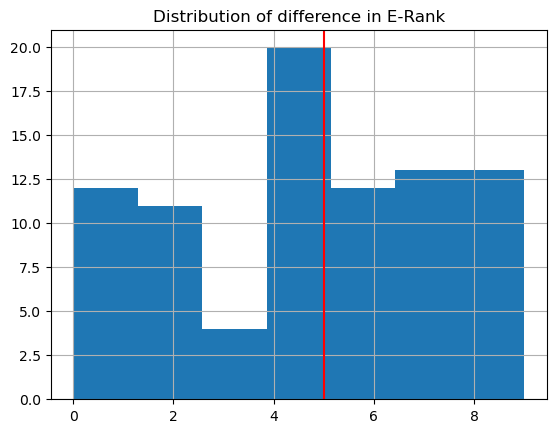

In [1745]:
e_difference.hist(bins=7)
plt.title('Distribution of difference in E-Rank')
plt.axvline(e_difference.median(),color = 'r')

In [1746]:
s_difference = abs(df_scores_merged.s_rank - df_scores_merged.s_rank_hp)
s_difference.mean()

3.788235294117647

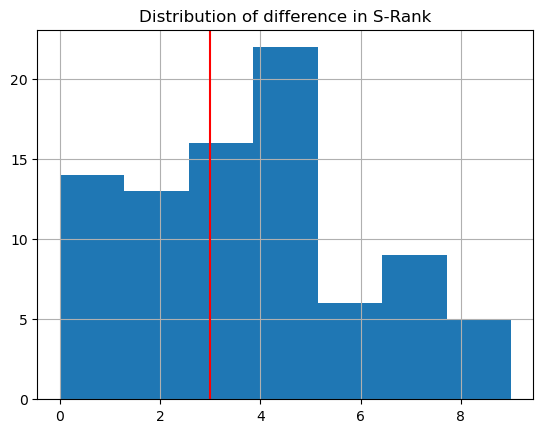

In [1747]:
s_difference.hist(bins=7)
plt.title('Distribution of difference in S-Rank')
plt.axvline(s_difference.median(),color = 'r')

In [1748]:
g_difference = abs(df_scores_merged.g_rank - df_scores_merged.g_rank_hp)
g_difference.mean()

3.7411764705882353

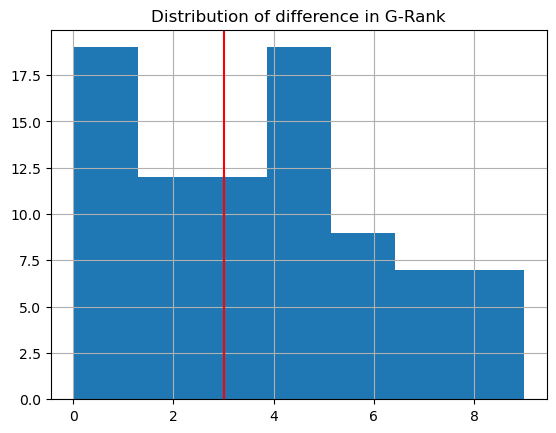

In [1749]:
g_difference.hist(bins=7)
plt.title('Distribution of difference in G-Rank')
plt.axvline(g_difference.median(),color = 'r')

As can be seen, the smallest disparity is for the G scores, with the largest disparity being the E scores. This disparity is unsurprising. The Sustainalytics Scores (where the historical scores come from) take into a wide variety of factors and data sources. The 'score' that I have created is based solely on how much emphasis is given to a certain topic in a report. 

Ultimately, all of the different scoring systems are subjective. Hence, making a direct comparison is not a very useful metric of success for my scoring. What would be more interesting would be to explore the data surrounding the E S and G spaces for each of these companies for 2021. The performance for each company could then be explored. This would show whether there was a link between the emphasis placed on a certain topic in their annual report, and the actual performance. However, this data is hard to come by and is one of the fundamental issues with the current ESG scoring process.